<a href="https://colab.research.google.com/github/azkalltlhn/Analisis-Penjualan-Regresi-Linear/blob/bigdata-2/BIGDATA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import seaborn as sns

In [2]:
sales_df = pd.read_csv('online_retail_2.csv')
sales_df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,190426,553192,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,48.0,5/15/2011 13:27,3.39,15333.0,United Kingdom
1,190427,553192,22751,FELTCRAFT PRINCESS OLIVIA DOLL,48.0,5/15/2011 13:27,3.39,15333.0,United Kingdom
2,190428,553192,22750,FELTCRAFT PRINCESS LOLA DOLL,48.0,5/15/2011 13:27,3.39,15333.0,United Kingdom
3,190429,553192,22940,FELTCRAFT CHRISTMAS FAIRY,48.0,5/15/2011 13:27,3.75,15333.0,United Kingdom
4,190430,553192,22271,FELTCRAFT DOLL ROSIE,48.0,5/15/2011 13:27,2.55,15333.0,United Kingdom


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33505 entries, 0 to 33504
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        33505 non-null  object 
 1   InvoiceNo    33114 non-null  object 
 2   StockCode    33114 non-null  object 
 3   Description  33014 non-null  object 
 4   Quantity     33114 non-null  float64
 5   InvoiceDate  33114 non-null  object 
 6   UnitPrice    33114 non-null  float64
 7   CustomerID   25911 non-null  float64
 8   Country      33113 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.3+ MB


In [4]:
sales_df['Description'] = sales_df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))
sales_df['CustomerID'] = sales_df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33505 entries, 0 to 33504
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        33505 non-null  object 
 1   InvoiceNo    33114 non-null  object 
 2   StockCode    33114 non-null  object 
 3   Description  33114 non-null  object 
 4   Quantity     33114 non-null  float64
 5   InvoiceDate  33114 non-null  object 
 6   UnitPrice    33114 non-null  float64
 7   CustomerID   33114 non-null  object 
 8   Country      33113 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.3+ MB


In [6]:
datetime_columns = ["InvoiceDate"]
for column in datetime_columns:sales_df[column] = pd.to_datetime(sales_df[column])

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33505 entries, 0 to 33504
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        33505 non-null  object        
 1   InvoiceNo    33114 non-null  object        
 2   StockCode    33114 non-null  object        
 3   Description  33114 non-null  object        
 4   Quantity     33114 non-null  float64       
 5   InvoiceDate  33114 non-null  datetime64[ns]
 6   UnitPrice    33114 non-null  float64       
 7   CustomerID   33114 non-null  object        
 8   Country      33113 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 2.3+ MB


In [8]:
top_countries = sales_df.groupby(by='Country').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"}).sort_values(by="UnitPrice",ascending=False).head(5)
top_countries.rename(columns={"InvoiceNo": "InvoiceCount","UnitPrice": "Revenue"}, inplace=True)
top_countries.head()

,InvoiceCount,Quantity,Revenue
Country,,,
United Kingdom,1768,282918.0,173217.32
Portugal,9,200.0,6153.91
Germany,45,7379.0,2566.81
EIRE,25,8315.0,2523.57
France,37,9463.0,2254.80


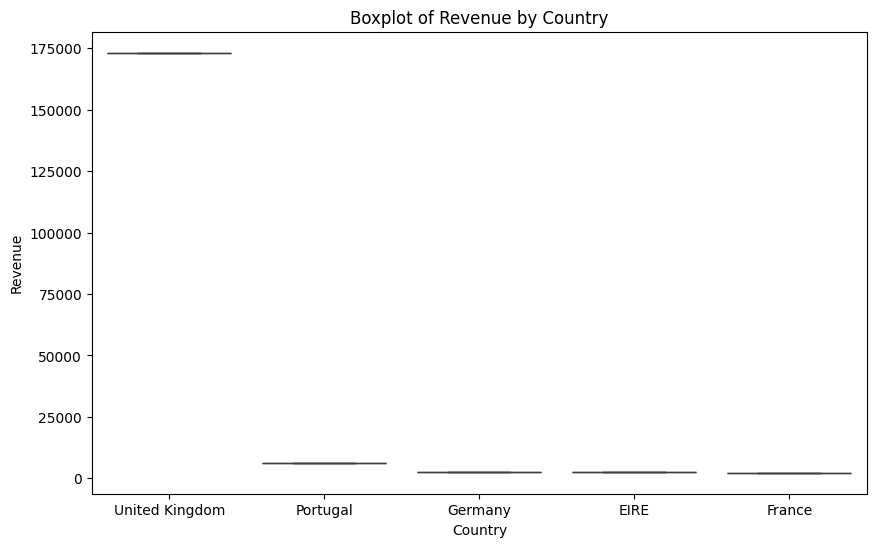

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=top_countries.index, y='Revenue', data=top_countries)

plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Boxplot of Revenue by Country')

plt.show()

In [10]:
monthly_revenue = sales_df.resample(rule='M', on='InvoiceDate').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"})
monthly_revenue['InvoiceDate'] = monthly_revenue.index.month
monthly_revenue_str = monthly_revenue.index.strftime('%B %Y')
monthly_revenue.rename(columns={"InvoiceNo": "InvoiceCount","UnitPrice": "Revenue"}, inplace=True)

<ipython-input-10-4d7c115f0c48>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = sales_df.resample(rule='M', on='InvoiceDate').agg({"InvoiceNo":"nunique","Quantity":"sum","UnitPrice":"sum"})


In [11]:
monthly_revenue.head(13)

,InvoiceCount,Quantity,Revenue,InvoiceDate
InvoiceDate,,,,
2011-05-31,1150,196475.0,93833.89,5
2011-06-30,796,139727.0,97935.38,6


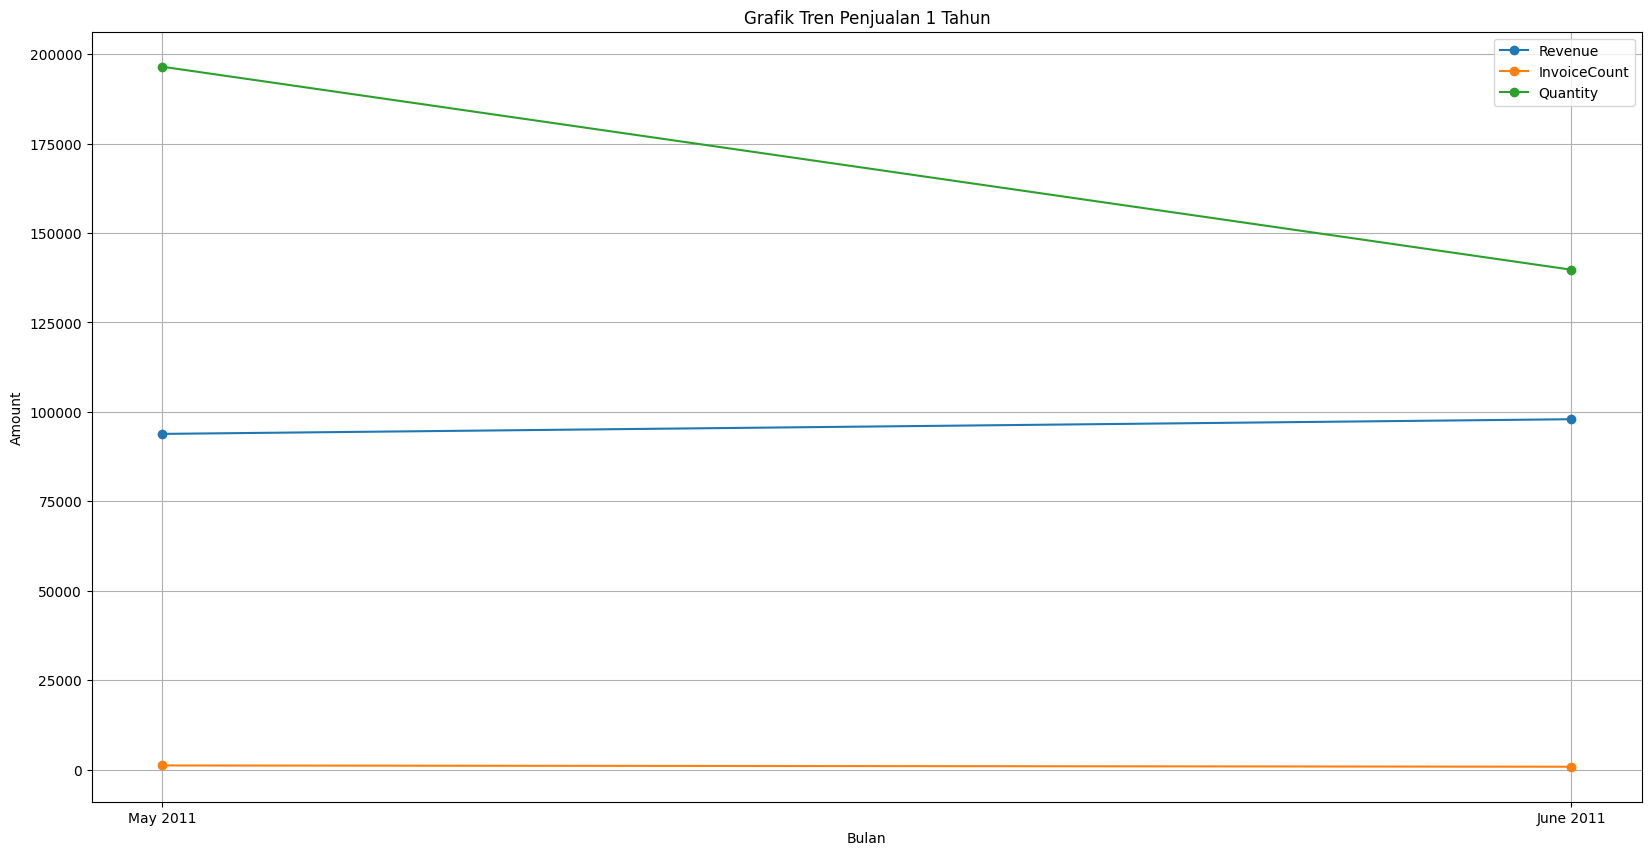

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(monthly_revenue_str,monthly_revenue['Revenue'], label='Revenue', marker='o', linestyle='-')
plt.plot(monthly_revenue_str, monthly_revenue['InvoiceCount'], label="InvoiceCount", marker='o', linestyle='-')
plt.plot(monthly_revenue_str, monthly_revenue['Quantity'], label='Quantity', marker='o', linestyle='-')
plt.title('Grafik Tren Penjualan 1 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

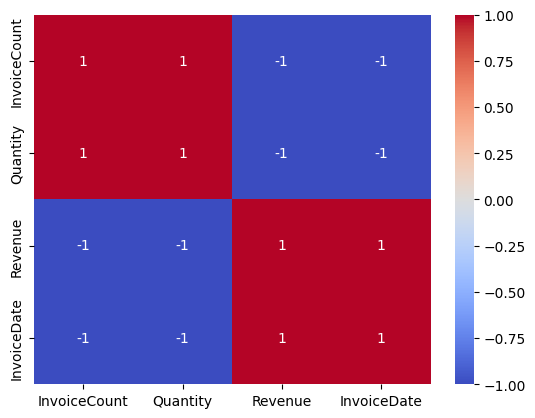

In [13]:
matriks_korelasi = monthly_revenue.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm')
plt.show()

In [14]:
X = monthly_revenue[['InvoiceCount','Quantity']]
y = monthly_revenue['Revenue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
hasil_train = model.score(X_train, y_train)
print('R-squarred hasil training : ', hasil_train)
hasil_testing = model.score(X_test, y_test)
print('R-squared hasil testing : ', hasil_testing)

R-squarred hasil training :  nan
R-squared hasil testing :  nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [15]:
future_dates = pd.date_range(monthly_revenue.index[-1] + pd.DateOffset(1), periods=12, freq='M')
future_dates_str = future_dates.strftime('%B %Y')
future_X = pd.DataFrame(index=future_dates, columns=['InvoiceCount', 'Quantity'])
future_X['InvoiceCount'] = [1476, 1393, 1983, 1744, 2162, 2012, 1927, 1737, 2327, 2637, 3462, 2025]
future_X['Quantity'] = [308966, 277989, 351872, 289098, 380391, 341623, 391116, 406199, 549817, 570532, 740286, 260520]
future_prediction = model.predict(future_X)
prediksi_penjualan = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Prediksi_Revenue': future_prediction
})
print(prediksi_penjualan)

   InvoiceDate  Prediksi_Revenue
0   2011-07-31          93833.89
1   2011-08-31          93833.89
2   2011-09-30          93833.89
3   2011-10-31          93833.89
4   2011-11-30          93833.89
5   2011-12-31          93833.89
6   2012-01-31          93833.89
7   2012-02-29          93833.89
8   2012-03-31          93833.89
9   2012-04-30          93833.89
10  2012-05-31          93833.89
11  2012-06-30          93833.89


<ipython-input-15-ed6d960efff6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_revenue.index[-1] + pd.DateOffset(1), periods=12, freq='M')


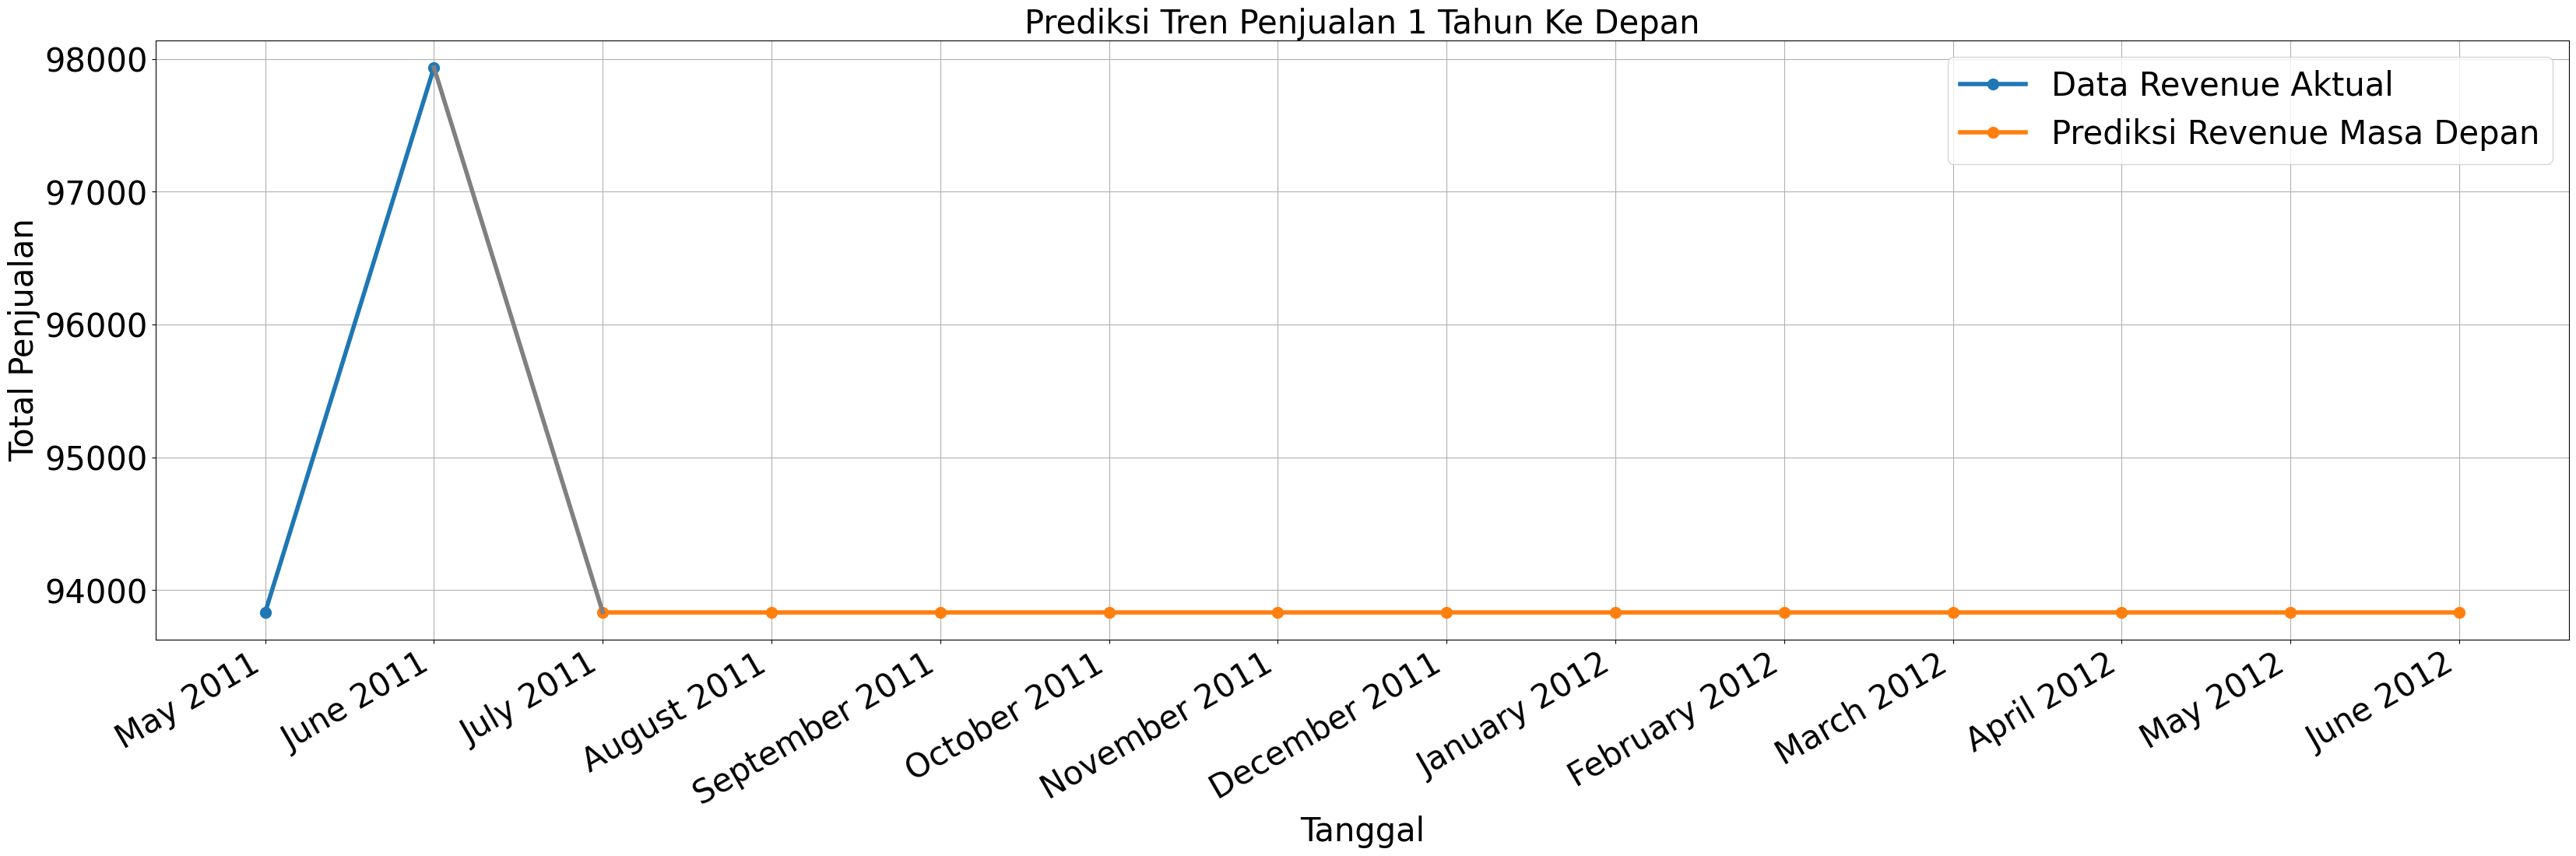

In [16]:
plt.figure(figsize=(40, 10))
plt.plot(monthly_revenue_str, monthly_revenue['Revenue'], marker='o', markersize=10, linestyle='-', linewidth=4, label='Data Revenue Aktual')
plt.plot(future_dates_str, future_prediction, marker='o', linestyle='-', markersize=10, linewidth=4, label='Prediksi Revenue Masa Depan')
plt.title('Prediksi Tren Penjualan 1 Tahun Ke Depan', fontsize=30)
plt.xlabel('Tanggal',fontsize=30)
plt.ylabel('Total Penjualan',fontsize=30)
plt.xticks(fontsize=30,rotation=30,ha='right')
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.grid(True)
last_actual_date_str = monthly_revenue_str[-1]
first_future_date_str = future_dates_str[0]
last_actual_revenue = monthly_revenue['Revenue'].iloc[-1]
future_prediction_series = pd.Series(future_prediction)
first_future_prediction = future_prediction_series.iloc[0]

plt.plot([last_actual_date_str, first_future_date_str], [last_actual_revenue, first_future_prediction], linestyle='-', linewidth=4, color='gray')
plt.show()